In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
import scipy.interpolate as inter
import plotly.express as px
from sklearn import preprocessing as skprep
import numba
import timeit
import math
from mnk import MNK
import itertools
from pprint import pprint

In [16]:
df = pd.read_csv("DataSet1_4.csv", sep=',')
df = df.dropna()
df = df.reset_index(drop=True)
df["Day"] = df["Day"].astype("datetime64")
df["Year"] = df["Year"].astype("int")
df["Total confirmed cases of COVID-19"] = df["Total confirmed cases of COVID-19"].astype("int")
df = df.drop(columns=["Entity", "Code", "Continent", "Year"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162901 entries, 0 to 162900
Data columns (total 3 columns):
 #   Column                                                                            Non-Null Count   Dtype         
---  ------                                                                            --------------   -----         
 0   Day                                                                               162901 non-null  datetime64[ns]
 1   Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)  162901 non-null  float64       
 2   Total confirmed cases of COVID-19                                                 162901 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 3.1 MB


In [18]:
df.nunique()

Day                                                                                   818
Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)    34718
Total confirmed cases of COVID-19                                                   87439
dtype: int64

In [19]:
df

,Day,"Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)",Total confirmed cases of COVID-19
0,2020-02-29,0.833,5
1,2020-03-01,0.714,5
2,2020-03-02,0.000,5
3,2020-03-03,0.000,5
4,2020-03-04,0.000,5
...,...,...,...
162896,2022-04-20,25.143,247336
162897,2022-04-21,25.000,247383
162898,2022-04-22,35.857,247488
162899,2022-04-23,41.000,247524


In [20]:
couples = list(itertools.combinations(df.columns, 2))
couples

[('Day',
  'Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)'),
 ('Day', 'Total confirmed cases of COVID-19'),
 ('Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)',
  'Total confirmed cases of COVID-19')]

In [21]:
funcs = [
    lambda x: x ** 0,
    lambda x: x,
    lambda x: x ** 2,
]

mnks = [MNK(df[couple[0]].values.astype("float64"), df[couple[1]].values.astype("float64"), funcs) for couple in
        couples]

array([ 4.92797873e+06, -6.19527533e-12,  1.94749673e-30])


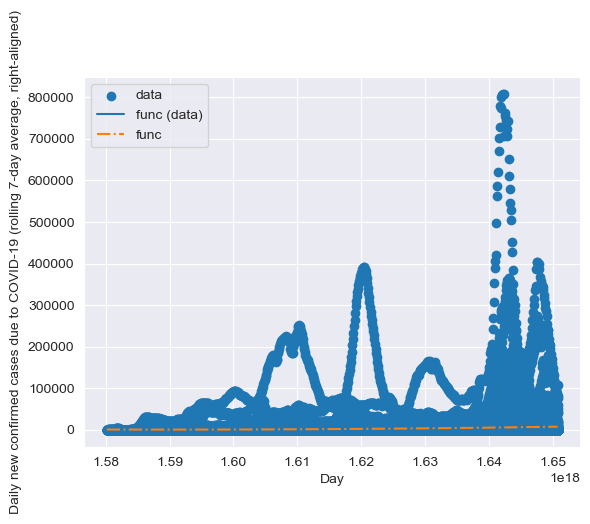

array([ 1.24356049e+09, -1.56931318e-09,  4.95113263e-28])


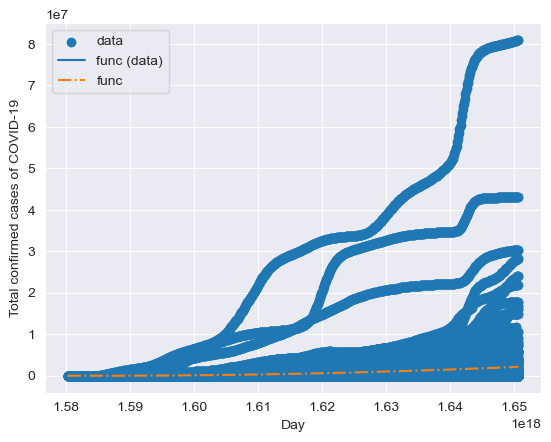

array([ 2.59472785e+05,  1.75197639e+02, -1.53767891e-04])


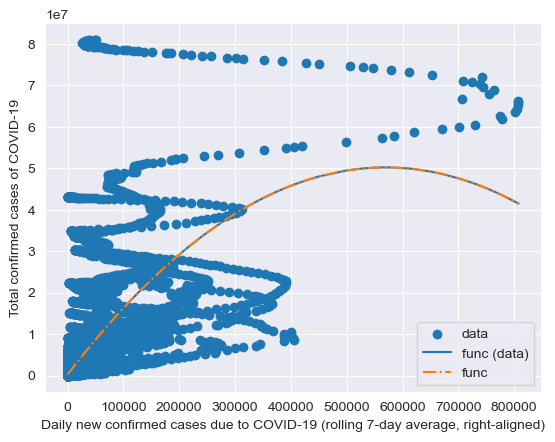

In [22]:
for i, mnk in enumerate(mnks):
    x_new = np.linspace(mnk.x.min(), mnk.x.max(), num=500,
                        endpoint=True)  # np.arange(x.min(), x.max(), (x.max() - x.min()) / 100)
    plt.scatter(mnk.x, mnk.y, label='data')
    plt.plot(np.sort(mnk.x), mnk.func(np.sort(mnk.x)), label='func (data)')
    plt.plot(x_new, mnk.func(x_new), '-.', label="func")
    plt.legend(loc='best')
    plt.xlabel(couples[i][0])
    plt.ylabel(couples[i][1])
    ax = plt.gca()
    # ax.set_xlim([0, 1])
    # ax.set_ylim([0, 1])
    pprint(mnk.c)
    plt.show()